<a href="https://colab.research.google.com/github/Leonardo-Dias-Up/GeoPandas/blob/main/Aut%C3%B4nomos_em_Belo_Horizonte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando as bibliotecas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 19.5 MB/s 
     |████████████████████████████████| 16.7 MB 253 kB/s 
     |████████████████████████████████| 6.3 MB 45.7 MB/s 


In [ ]:
# Importando as bibliotecas
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
import pandas as pd
import numpy as np

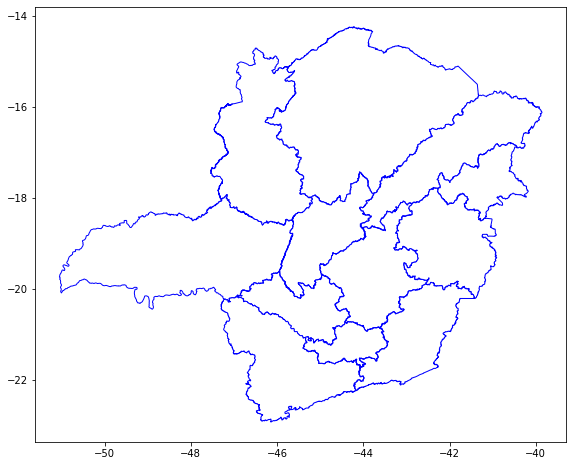

In [ ]:
# GeoDataFrame - Mesoregiões MG
MesoRegioes_MG = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IBGE - Mesoregiões MG/MG_Mesorregioes_2021.shx',encoding="utf-8")
MesoRegioes_MG.plot(figsize=(16,8), facecolor='white', edgecolor='blue')


In [ ]:
# GeoDataFrame - Municipios MG
Municipios_MG = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IBGE - Municipios MG/MG_Municipios_2021.shp', encoding='utf-8')
Municipios_MG.head()
type(Municipios_MG['geometry'])

geopandas.geoseries.GeoSeries

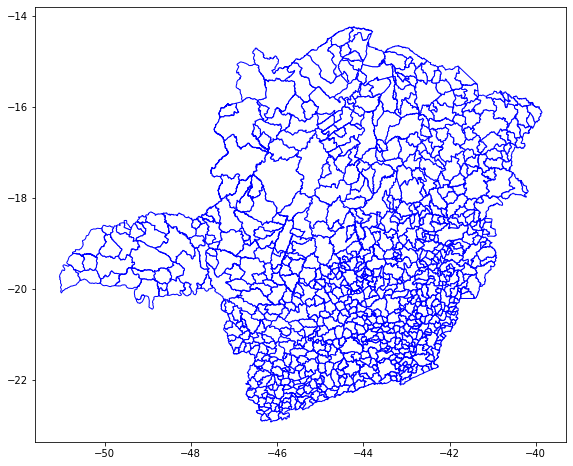

In [ ]:
# Melhorando a visualização do plt
Municipios_MG.plot(figsize=(16,8), facecolor='white', edgecolor='blue')
plt.show()

In [ ]:
# Filtrando apenas Belo Horizonte
gpd_BH = Municipios_MG[Municipios_MG['NM_MUN'] == 'Belo Horizonte']
type(gpd_BH['geometry'])

geopandas.geoseries.GeoSeries

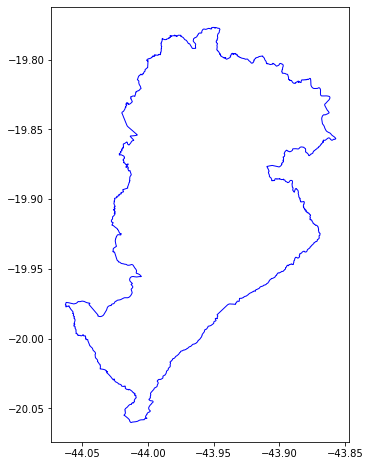

In [ ]:
# Plot Belo Horizonte
gpd_BH.plot(figsize=(16,8), facecolor='white', edgecolor='blue')

In [ ]:
# Salvar o gráfico em arquivo Json com coordenadas
caminho = '/content/drive/MyDrive/Colab Notebooks/IBGE - Municipios MG/capital_Belo_Horizonte.json'
gpd_BH.to_file(caminho, drive='GeoJSON')

In [ ]:
# Autonômos em BH - fonte dados aberto prefeitura de Belo Horizonte
autonomos_BH = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Prefeitura BH/autônomos_em_bh.csv')
autonomos_BH = autonomos_BH.dropna()
autonomos_BH.columns

Index(['_id', 'COD_INSCRICAO_MUNICIPAL', 'AREA_UTILIZADA', 'AREA_SUJEITA_TFS',
       'CODIGO_CBO', 'DESCRICAO_CBO', 'TIPO_LOGRADOURO', 'LOGRADOURO',
       'NUMERO', 'COMPLEMENTO', 'DATA_INICIO_ATIVIDADE', 'NOME_BAIRRO_POPULAR',
       'NOME_REGIONAL', 'GEOMETRIA'],
      dtype='object')

In [ ]:
# Analisando autonomos_BH['GEOMETRIA'] para converter em GeoPandas
autonomos_BH_GeoPandas = autonomos_BH['GEOMETRIA']
autonomos_BH_GeoPandas.head(30)

0     POINT (604339.165887895 7800695.22328009)
2     POINT (608049.288798734 7790433.08092281)
4      POINT (610491.10892488 7790852.82317423)
5      POINT (610491.10892488 7790852.82317423)
6      POINT (610491.10892488 7790852.82317423)
8      POINT (610491.10892488 7790852.82317423)
9     POINT (604414.046387161 7797632.81022541)
11    POINT (615079.819333143 7800470.75778278)
18     POINT (606168.444698201 7804057.9176268)
19     POINT (606168.444698201 7804057.9176268)
20     POINT (606168.444698201 7804057.9176268)
21     POINT (612979.553315893 7799471.7211338)
22    POINT (612465.391940662 7801556.67674713)
25    POINT (614459.345323122 7799540.32072453)
33    POINT (612972.338731862 7794902.54014319)
34     POINT (609904.05129376 7791399.32424678)
35     POINT (609904.05129376 7791399.32424678)
36    POINT (601484.907513397 7788612.53846732)
37    POINT (614840.223660625 7804350.46733775)
39     POINT (608403.93431606 7807722.91162789)
42    POINT (610172.077352633 7803804.75

In [ ]:
# Tratamento autonomos_BH['GEOMETRIA'] 
var1 = []
var2 = []

for i in autonomos_BH_GeoPandas:
  # print(str(len(i))) #Analisando o tamanho da str para realizar a extração do text latitude e longitude
  if len(i) == 41:
    split1 = i.split()
    # latitude for len(str) = 40
    split1[1] = split1[1].replace("(","")
    var1.append(split1[1])
    
    # longitude for len(str) = 40
    split2 = i.split()
    split2[2] = split2[2].replace(")","")
    var2.append(split2[2])

  else:
    # latitude for len(str) = 39
    split3 = i.split()
    split3[1] = split3[1].replace("(","")
    var1.append(split3[1])
    
    # longitude for len(str) = 39
    split4 = i.split()
    split4[2] = split4[2].replace(")","")
    var2.append(split4[2])

# Tratamento realizado
# Latitude
latitude = var1
# Longitude
longitude = var2


In [ ]:
# Converter as coordenadas em Point(x,y)
# Criando um dicionário
data = {"Latitude": latitude,
        "Longitude": longitude}

# Criando um DataFrame com as Latitudes e Longitudes
coordenadas = pd.DataFrame(data)

# Latitude str list to float list
coordenadas['Latitude'] = [float(x) for x in coordenadas['Latitude']]

# Longitude  str list to float list
coordenadas['Longitude'] = [float(x) for x in coordenadas['Longitude']]
print("Latitude:", coordenadas['Longitude'][0], "\nLongitude:", coordenadas['Latitude'][0])


Latitude: 7800695.22328009 
Longitude: 604339.165887895


In [ ]:
# Merge entre coordenadas e autonomos_BH
autonomos_BH['Latitude'] = coordenadas['Latitude'].values
autonomos_BH['Longitude'] = coordenadas['Longitude'].values

# Criando a colunas GEOMETRY no DataFrame Original - autonomos_BH
autonomos_BH['GEOMETRY'] = None

for index, row in autonomos_BH.iterrows():
  autonomos_BH.loc[index, 'GEOMETRY'] = Point(row.Latitude, row.Longitude)

autonomos_BH['GEOMETRY']

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/managers.py:327: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


0        POINT (604339.165887895 7800695.22328009)
2        POINT (608049.288798734 7790433.08092281)
4         POINT (610491.10892488 7790852.82317423)
5         POINT (610491.10892488 7790852.82317423)
6         POINT (610491.10892488 7790852.82317423)
                           ...                    
25624    POINT (612549.465043841 7796502.01319069)
25626    POINT (612549.465043841 7796502.01319069)
25627    POINT (612549.465043841 7796502.01319069)
25629     POINT (607604.71036167 7795403.24167972)
25631     POINT (607604.71036167 7795403.24167972)
Name: GEOMETRY, Length: 15717, dtype: object

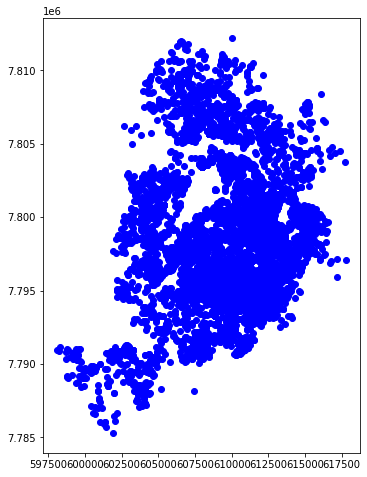

In [ ]:
# Criando o GeoPandas
autonomos_BH_gpd = gpd.GeoDataFrame(autonomos_BH, geometry = 'GEOMETRY')
autonomos_BH_gpd = autonomos_BH_gpd.drop(columns=['GEOMETRIA', 'Latitude', 'Longitude'])
autonomos_BH_gpd = autonomos_BH_gpd[['GEOMETRY','DESCRICAO_CBO']]
autonomos_BH_gpd.plot(figsize=(12,8), color='blue')

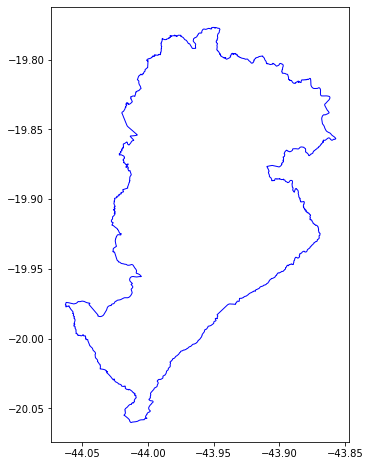

In [ ]:
# Plotado a nuvem de autônomos em BH juntamente com a cidade de Belo Horizonte
fig, ax = plt.subplots(figsize=(12,8))

gpd_BH.plot(ax=ax, facecolor='white', edgecolor='blue')
# autonomos_BH_gpd.plot(ax=ax, color='green') # Necessita normalização nas coordenadas

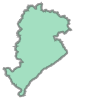

In [ ]:
# Poligono da cidade de Belo Horizonte
polygon = gpd_BH.iloc[0].geometry
polygon

In [ ]:
# Intersecção entre os trabalhadores autônomos e a cidade de Belo Horizonte
autonomos_BH_intersc = autonomos_BH_gpd[autonomos_BH_gpd.intersects(polygon)]
autonomos_BH_intersc

,GEOMETRY,DESCRICAO_CBO


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


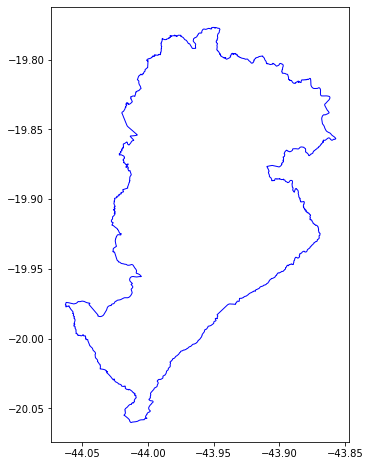

In [ ]:
# Plotado a nuvem de autônomos em BH juntamente com a cidade de Belo Horizonte
fig, ax = plt.subplots(figsize=(12,8))

autonomos_BH_intersc.plot(ax=ax) # Necessita normalização nas coordenadas
gpd_BH.plot(ax=ax, facecolor='white', edgecolor='blue')


In [ ]:
# Salvar o gráfico em arquivo Json com coordenadas
caminho = '/content/drive/MyDrive/Colab Notebooks/Prefeitura BH/autônomos_em_bh_mapa.json'
gpd_BH.to_file(caminho, drive='GeoJSON')